# Flights Data Exploration Challenge

In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [22]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [23]:
# Your code to explore the data
df_flights[df_flights.isnull().any(axis=1)]
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

## Remove empty values.

In [24]:
cleaned = df_flights.dropna()
cleaned.isnull().sum()
df_flights = cleaned;
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Remove outliars



## Show data destribution

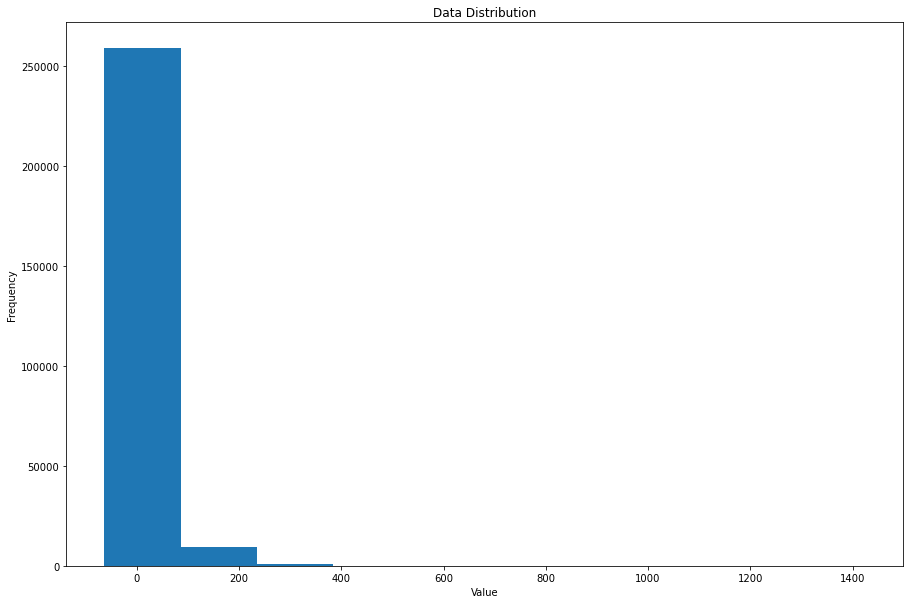

In [25]:
var_data = df_flights.DepDelay

def show_distribution(var_data):
    # Create a Figure
    fig = plt.figure(figsize=(15,10))

    # Plot a histogram
    plt.hist(var_data)

    # Add titles and labels
    plt.title('Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the figure
    fig.show()

show_distribution(var_data)


## Show data density

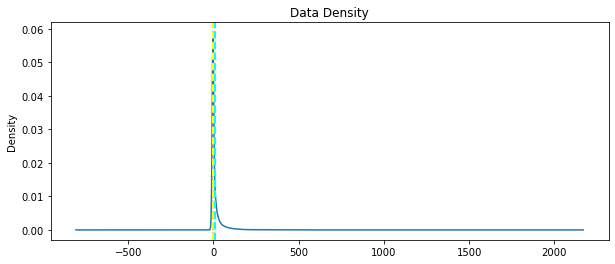

In [26]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')
    # plt.xlabel("Grade")
    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_flights.DepDelay
show_density(col)

## Identify departure delay extreme low and highs

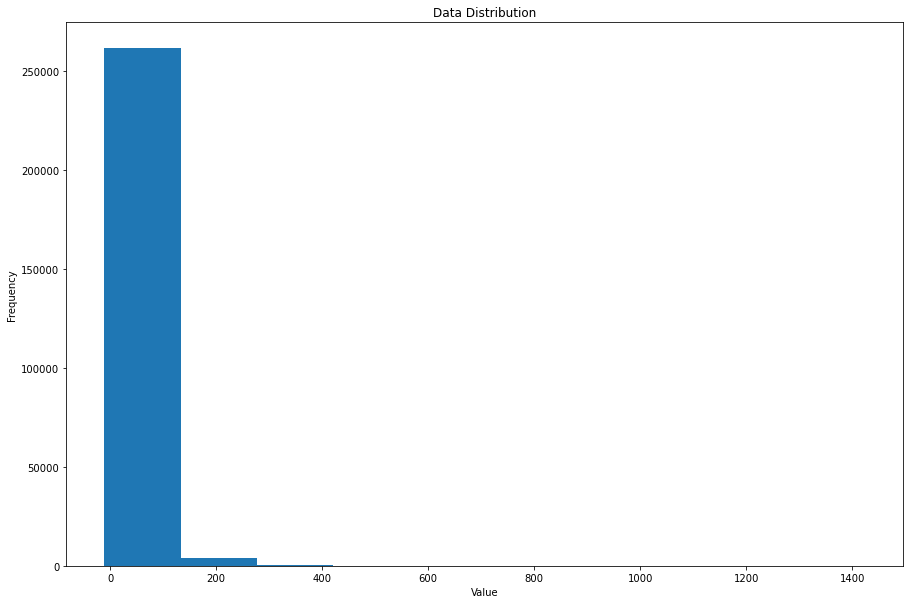

In [27]:
## Extreme low is below 0.01%

## So we remove those entries by using quntile

lower_cut = df_flights.DepDelay.quantile(0.01)
# Get the variable to examine
col = df_flights[df_flights.DepDelay>lower_cut]['DepDelay']
# Call the function
show_distribution(col)


# df_flights = df_flights[df_flights.DepDelay>q01];

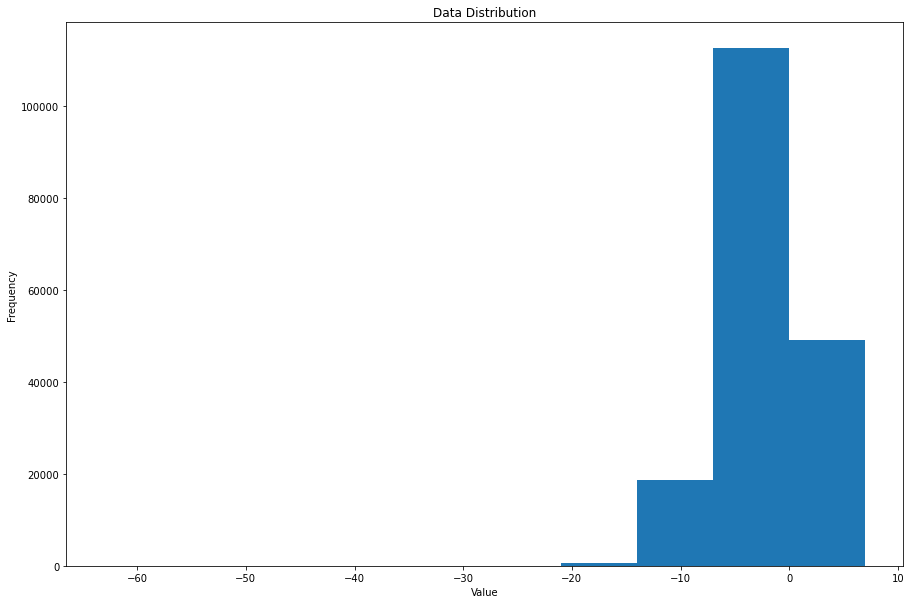

In [39]:
## Extreme high - above 99.9%
# show_distribution(df_flights.DepDelay)

upper_cut = df_flights.DepDelay.quantile(0.90);
upper_cleaned = df_flights[df_flights.DepDelay < upper_cut]
df_flights = df_flights[df_flights.DepDelay < upper_cut];
show_distribution(upper_cleaned.DepDelay);



In [29]:
df_flights.DepDelay.describe()

count    241769.000000
mean          1.332495
std           9.594450
min         -63.000000
25%          -5.000000
50%          -2.000000
75%           4.000000
max          36.000000
Name: DepDelay, dtype: float64

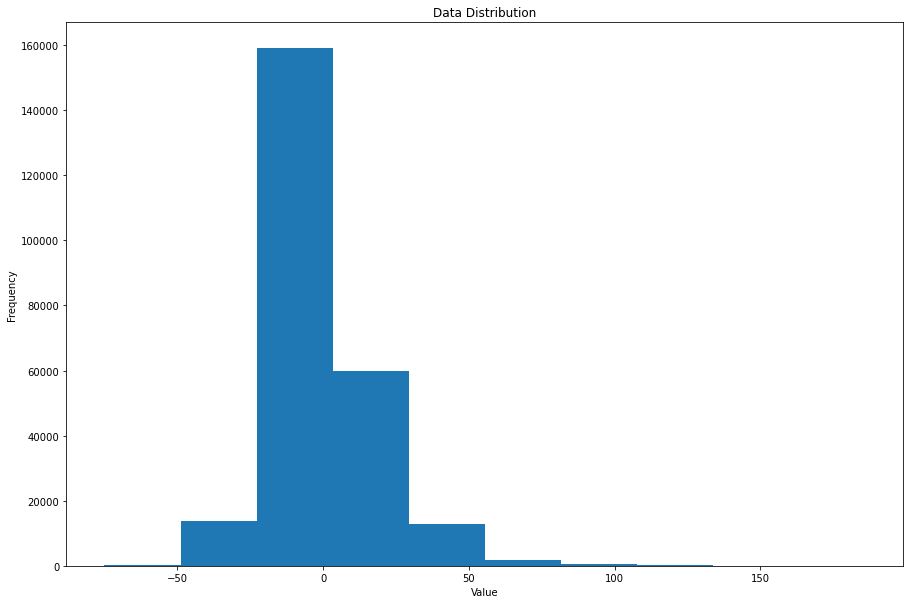

## Identify and remove arrival delay exteme highs and lows

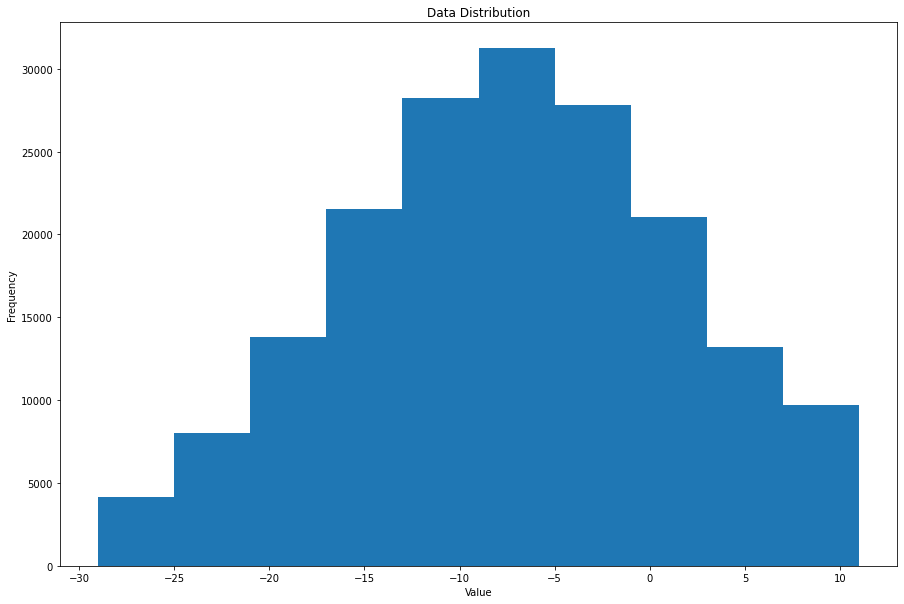

In [40]:
## Lower cut
arr_lower_cut = df_flights.ArrDelay.quantile(0.01);
arr_lower_cut
col = df_flights[df_flights.ArrDelay > arr_lower_cut].ArrDelay
col.count()
show_distribution(col);

df_flights = df_flights[df_flights.ArrDelay > arr_lower_cut]


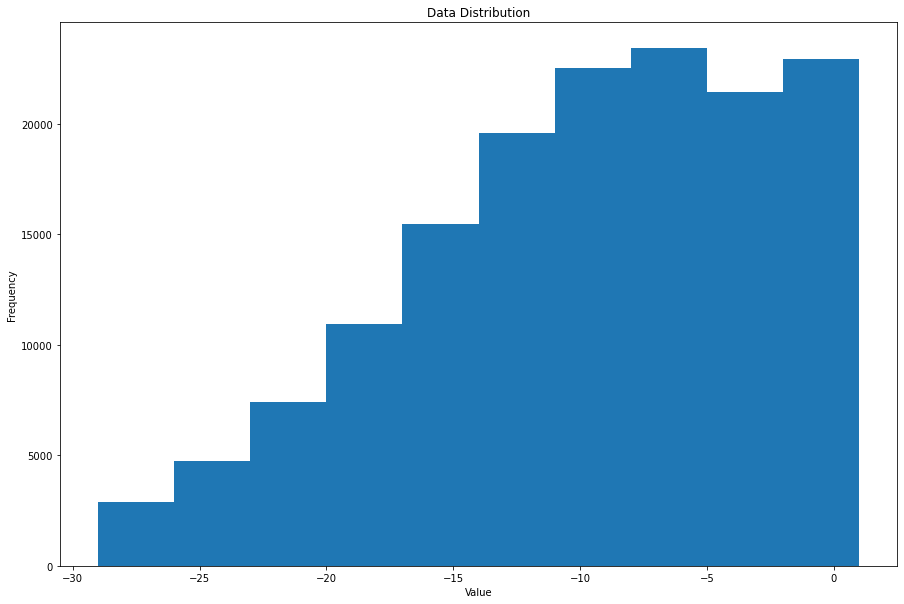

In [41]:
## Upper cut

arr_upper_cut = df_flights.ArrDelay.quantile(0.85);
arr_upper_cut

col = df_flights[df_flights.ArrDelay < arr_upper_cut].ArrDelay
col.count()
show_distribution(col);

df_flights = df_flights[df_flights.ArrDelay < arr_upper_cut]


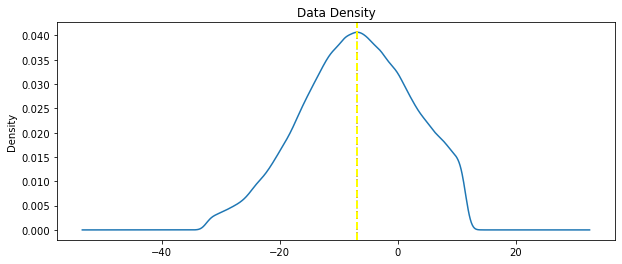

In [32]:
df_flights.ArrDelay.describe()
show_density(df_flights.ArrDelay)

## Carrier relation with departure delay


In [33]:
df_flights[df_flights.Carrier == "WN"].Carrier
df_flights[["DepDelay", "ArrDelay","Carrier"]].groupby(df_flights.Carrier).mean()


,DepDelay,ArrDelay
Carrier,,
9E,-2.974804,-9.500417
AA,-0.632069,-7.859467
AS,-3.936281,-6.132450
B6,-2.431397,-8.349760
DL,-1.401248,-8.176964
EV,-2.538179,-9.038044
F9,-1.315312,-3.157064
FL,-0.349564,-6.124946
HA,-3.549102,-3.819760


## Is there a noticable difference in arrival delays for different days of the week?

In [34]:
df_flights[["ArrDelay","DayOfWeek"]].groupby(df_flights.DayOfWeek).mean()


,ArrDelay,DayOfWeek
DayOfWeek,,
1,-6.923102,1.0
2,-7.290554,2.0
3,-6.876629,3.0
4,-6.182608,4.0
5,-6.507673,5.0
6,-7.831790,6.0
7,-7.386902,7.0


### Nope

## Which departure airport has the highest average departure delay?

In [35]:
mean_dep_by_carrier = df_flights[["DepDelay", "Carrier"]].groupby(df_flights.Carrier).mean();
max_mean_dep_delay = mean_dep_by_carrier.DepDelay.max()

mean_dep_by_carrier[mean_dep_by_carrier.DepDelay == max_mean_dep_delay]


,DepDelay
Carrier,
WN,2.192317


## Do late departures tend to result in longer arrival delays than on-time departures?

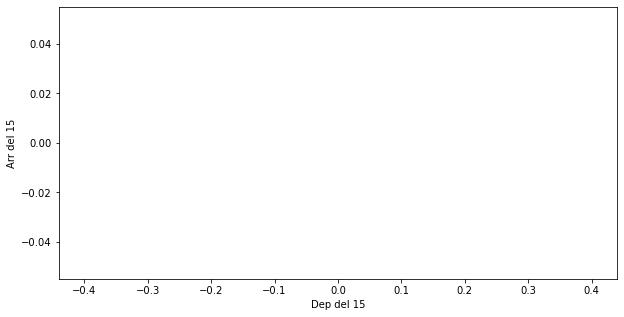

In [44]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,5))

# Create a bar plot of name vs grade
plt.bar(x=df_flights.DepDel15[0:60], height=df_flights.ArrDel15[0:60], color='orange')
plt.xlabel("Dep del 15")
plt.ylabel("Arr del 15")
plt.show()

# df_flights.DepDel15.count()
# df_flights.DepDel15[df_flights.DepDel15 == 1]
# print("adsf")

In [37]:
# from sklearn.preprocessing import MinMaxScaler

# # Get a scaler object
# scaler = MinMaxScaler()

# # Create a new dataframe for the scaled values
# df_normalized = df_sample[['DepDelay', 'ArrDelay']].copy()

# # Normalize the numeric columns
# df_normalized[['DepDelay', 'ArrDelay']] = scaler.fit_transform(df_normalized[['DepDelay', 'ArrDelay']])

# # Plot the normalized values
# df_normalized.plot(x='Year', y=['DepDelay', 'ArrDelay'], kind='bar', figsize=(8,5))

## Which route (from origin airport to destination airport) has the most late arrivals?

In [38]:
# df_flight[["OriginAirportName", "DestAirportName", ""]]